Elaboração de tutorial de detecção de bordas
=====
-------

1. Desenvolva um tutorial mostrando a utilização das funções de detecção de bordas estudadas e teoria. Elabore um script em python (notebook jupyter) demonstrando os conceitos com a aplicação dos algoritmos em imagens representativas.

2. Demonstre a utilização da suavização de uma imagem com filtro Gaussiano com subtração da imagem filtrada da imagem original para detecção de bordas. 

    a) Qual o resultado obtido? 

    b) Some o resultado com a imagem original. O que aconteceu? Analise o resultado.

    Teste diferentes imagens com diferentes características.

    Procure na literatura a fundamentação para o experimento e explique os resultados obtidos. 

3. Estenda os conceitos de detecção de bordas para imagens coloridas. Explique e demonstre a aplicação de detecção de bordas em imagens coloridas. Utilize como referência para fundamentar os resultados os conceitos apresentados no capítulo 6 do livro Processamento de Imagens Digitais do Gonzalez (disponível online na biblioteca da Unesp).

Detecção de Bordas
===
--------

In [1]:
import matplotlib.pyplot as plt

def display(result,title,img_array):
    plt.figure(figsize=(10,7))
    for i in range(len(result)):
        plt.subplot(img_array*10 + i + 1), plt.imshow(result[i], 'gray'), plt.title(title[i]), plt.axis('off')

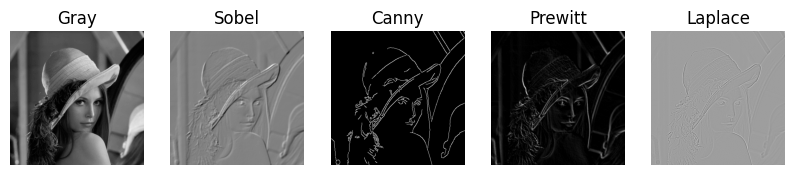

In [2]:
import cv2
import numpy as np
 
# Carregando a imagem
img = cv2.imread('lena.jpg')
 
# Convertendo para Escala de Cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicando suavização para melhor detecção de borda
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobel = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

# Prewitt Edge Detection
kernelx = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
    ])
kernely = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
    ])
img_prewittx = cv2.filter2D(img_blur, -1, kernelx)
img_prewitty = cv2.filter2D(img_blur, -1, kernely)
prewitt = cv2.addWeighted(img_prewittx, 0.5, img_prewitty, 0.5, 0)

#Laplace Edge Detection
dst = cv2.Laplacian(img_gray, cv2.CV_16S, ksize=3)
abs_dst = cv2.convertScaleAbs(dst)


display([img_gray,sobel,edges,prewitt,dst],["Gray","Sobel","Canny","Prewitt","Laplace"],15)

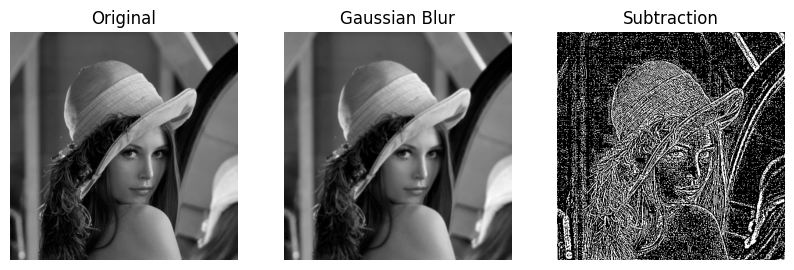

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

scr = cv.imread('lena.jpg')
gray = cv.cvtColor(scr, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (3,3), 0)

result = blur - gray

plt.figure(figsize=(10,7))

for i in range(3):
    list = [gray,blur,result]
    title = ['Original', 'Gaussian Blur', 'Subtraction']
    plt.subplot(131 + i), plt.imshow(list[i], 'gray'), plt.title(str(title[i])), plt.axis('off')